# Step 1: Installation and Setup

In [3]:
import tensorflow as tf

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data preprocessing

In [5]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [6]:
# loading the dataset
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

In [7]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [9]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
np.max(x_train), np.min(x_train), np.mean(x_train)

(255, 0, 72.94035223214286)

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
np.max(y_train), np.min(y_train)

(9, 0)

In [13]:
class_names=['0 Top/T-shirt','1 Trouser','2 Pullover','3 Dress','4 Coat','5 Sandal','6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


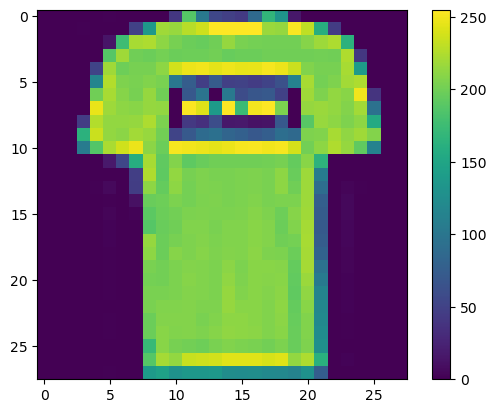

In [14]:
# Data Exploration 
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()


In [15]:
y_train[1]

0

In [16]:
# Normalizing the dataset 
x_train=x_train /255.0
x_test=x_test /255.0

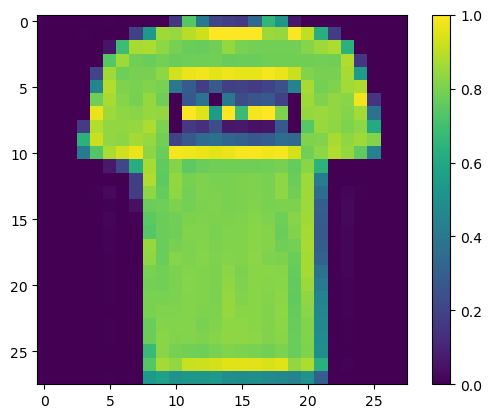

In [17]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [18]:
# Flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
x_train= x_train.reshape(-1, 28*28)
x_test=x_test.reshape(-1, 28*28)

In [21]:
x_train.shape , x_test.shape

((60000, 784), (10000, 784))

# Building the model

In [24]:
# Define an object
model=tf.keras.models.Sequential()
# sequence of layers


In [26]:
# adding first fully connected hidden layer 
# 1) units(No of neurons =128)
# 2) activation function = ReLU
# 3) input shape=784
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))


c:\Users\mekon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# adding the second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization tehnique, prevents overfitting


In [29]:
# Adding the output layer
# 1) units =10
# 2) activation = 'softmax' for multi-class classification
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Training the model

In [31]:
# Compiling the model
# 1) Optimizer = adam, (minimize the loss function)
# 2) Loss function =(acts as huide to optimizer)
# 3) matrices

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])



In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,880 (397.97 KB)

 Trainable params: 101,880 (397.97 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# training the model
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.7033 - sparse_categorical_accuracy: 0.5379
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9099 - sparse_categorical_accuracy: 0.6649
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7428 - sparse_categorical_accuracy: 0.7091
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6553 - sparse_categorical_accuracy: 0.7673
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6078 - sparse_categorical_accuracy: 0.7712
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5738 - sparse_categorical_accuracy: 0.7782
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5510 - sparse_categorical_accuracy: 0.7802
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5162 - sparse_categorical_accuracy: 0.8042
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4917 - sparse_categorical_accuracy: 0.8176
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━

# Step 5: Model evaluation and prediction

In [34]:
# Model evaluation
test_loss, test_accuracy=model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4716 - sparse_categorical_accuracy: 0.8403


In [35]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.8392000198364258


In [53]:

# Presupunând că 'model' este modelul tău pre-antrenat și 'x_test' sunt datele de test.
y_pred_probabilities = model.predict(x_test)  # Aceasta va returna probabilitățile pentru fiecare clasă
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convertim probabilitățile în indicele clasei cu cea mai mare probabilitate

# Acum, y_pred va conține clasele prezise, similar cu ce era returnat de predict_classes
print(y_pred)  # Afișează array-ul cu clasele prezise


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[9 2 1 ... 8 1 5]


In [54]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [55]:
y_pred[0]

9

In [61]:
y_test[110] , y_test[110] #predicted and actual output

(2, 2)

In [62]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [63]:
# confussion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[833   2   4  48   3   0  98   0  12   0]
 [ 13 952   0  27   3   0   5   0   0   0]
 [ 12   0 732   8 100   0 146   0   2   0]
 [ 19   1   0 909  28   0  41   0   2   0]
 [  1   0 294  47 522   0 134   0   2   0]
 [  0   0   0   0   0 963   0  19   2  16]
 [182   0 112  28  58   0 604   0  16   0]
 [  0   0   0   0   0  17   0 948   0  35]
 [  0   0   0   2   4   2  23   4 965   0]
 [  0   0   0   0   0   8   0  27   1 964]]


In [64]:
acc_cm=accuracy_score(y_test, y_pred)
print(acc_cm)

0.8392
